In [62]:
import torch
torch.__version__

import numpy as np
from PIL import Image

import matplotlib.pyplot as plt

from torch.autograd import Variable

# creating data for neural network
# Training Data
def get_data():
    train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
    train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
    dtype = torch.FloatTensor
    X = Variable(torch.from_numpy(train_X).type(dtype),requires_grad=False).view(17,1)
    y = Variable(torch.from_numpy(train_Y).type(dtype),requires_grad=False)
    return X,y

def plot_variable(x,y,z='',**kwargs):
    l = []
    for a in [x,y]:
        #if type(a) == Variable:
            l.append(a.data.numpy())
    plt.plot(l[0],l[0],z,**kwargs)

def get_weights():
    w = Variable(torch.randn(1),requires_grad = True)
    b = Variable(torch.randn(1),requires_grad=True)
    return w,b

def simple_network(x):
    y_pred = torch.matmul(x,w)+b
    return y_pred

def loss_fn(y,y_pred):
    loss = (y_pred-y).pow(2).sum()
    for param in [w,b]:
        if not param.grad is None: param.grad.data.zero_()
    loss.backward()
    #return loss.data[0]
    return loss.data.item()

def optimize(learning_rate):
    w.data -= learning_rate * w.grad.data
    b.data -= learning_rate * b.grad.data

learning_rate = 1e-4

In [63]:
x,y = get_data()
w,b = get_weights() 

for i in range(500):
    y_pred = simple_network(x) 
    loss = loss_fn(y,y_pred)
    if i % 50 == 0: 
        print(loss)
    optimize(learning_rate)

45.02029037475586
3.1083009243011475
3.0883731842041016
3.069254159927368
3.0509092807769775
3.0333046913146973
3.016413450241089
3.0002036094665527
2.9846508502960205
2.9697256088256836


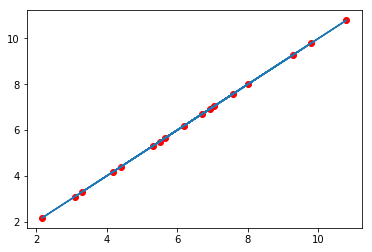

In [64]:
x_numpy = x.data.numpy()
plot_variable(x,y,'ro')
plot_variable(x,y_pred,label='Fitted line')